In [2]:
import geopandas as gpd
import pandas as pd
import os, glob
from IPython.display import display
import matplotlib.pyplot as plt


In [21]:
sigec_shp = '/export/homes/diheymans/Shared/PourNicolas/WalloniaSIGEC_2021/SOcS2021AttrTypeP_.shp'

computer_path = '/export/miro/ndeffense/LBRAT2104/'
grp_letter    = 'U'
tile = '31UFR'

# Directory for all work files
work_path = f'{computer_path}GROUP_{grp_letter}/WORK/{tile}/'
roi_path = f'{work_path}ROI/'


sigec_student_shp = f'{work_path}SIGEC/sigec_2021_{tile}.shp'

print(f'Input shp : {sigec_shp}')
print(f'Output shp : {sigec_student_shp}')

Input shp : /export/homes/diheymans/Shared/PourNicolas/WalloniaSIGEC_2021/SOcS2021AttrTypeP_.shp
Output shp : /export/miro/ndeffense/LBRAT2104/GROUP_U/WORK/31UFR/SIGEC/sigec_2021_31UFR.shp


## Set region of interest

In [23]:
crs = 'EPSG:32631'

if tile == '31UES':
    roi_name = 'ROI_Enghien'
elif tile == '31UFR':
    roi_name = 'ROI_Bastogne'

roi_filename = f'{roi_name}_31370.shp'
roi_file     = f'{roi_path}{roi_filename}'

roi_gdf = gpd.read_file(roi_file).to_crs(crs)

print(f'ROI shapefile : {roi_file}')

ROI shapefile : /export/miro/ndeffense/LBRAT2104/GROUP_U/WORK/31UFR/ROI/ROI_Bastogne_31370.shp


In [5]:
gdf = gpd.read_file(sigec_shp).to_crs(crs)

display(gdf)

,REF_ID,CULTURE,CULT_NOM,geometry
0,1990964305,62,Prairie temporaire,"POLYGON Z ((699739.870 5554311.809 0.000, 6997..."
1,1990964406,62,Prairie temporaire,"POLYGON Z ((699418.734 5554153.735 0.000, 6994..."
2,1248684333,610,"Prairie permanente (taux de couverture > 90%),...","POLYGON Z ((699835.101 5553532.434 0.000, 6999..."
3,1248685141,610,"Prairie permanente (taux de couverture > 90%),...","POLYGON Z ((699452.063 5553897.487 0.000, 6996..."
4,1248684737,610,"Prairie permanente (taux de couverture > 90%),...","POLYGON Z ((700502.194 5553773.868 0.000, 7004..."
...,...,...,...,...
277813,1580234187,73,Luzerne,"POLYGON Z ((547865.659 5584582.473 0.000, 5478..."
277814,1580213806,311,Froment dhiver,"POLYGON Z ((706393.832 5498186.915 0.000, 7063..."
277815,1975325982,610,"Prairie permanente (taux de couverture > 90%),...","POLYGON Z ((600005.805 5578758.047 0.000, 5999..."
277816,1580235918,610,"Prairie permanente (taux de couverture > 90%),...","POLYGON Z ((600184.306 5578839.075 0.000, 6002..."


In [24]:
cult_code = gdf[['CULTURE','CULT_NOM']].drop_duplicates()

pd.set_option('display.max_rows', 10)

display(cult_code)

,CULTURE,CULT_NOM
0,62,Prairie temporaire
2,610,"Prairie permanente (taux de couverture > 90%),..."
10,39,Céréales ET légumineuses
11,73,Luzerne
15,201,Maïs ensilage
...,...,...
208432,4112,Navette dhiver (graines)
221401,9732,cultures fruitières pluriannuelles (prunes) - ...
224151,9525,Brocoli
224637,9546,Chou de Milan


### Select polygons inside ROI

In [25]:
roi_gdf = gdf[gdf.within(roi_gdf.geometry[0])]

display(roi_gdf)

,REF_ID,CULTURE,CULT_NOM,geometry
14,1843636257,610,"Prairie permanente (taux de couverture > 90%),...","POLYGON Z ((694879.766 5548088.371 0.000, 6948..."
15,1843632924,201,Maïs ensilage,"POLYGON Z ((695795.661 5548897.376 0.000, 6958..."
16,1917899053,62,Prairie temporaire,"POLYGON Z ((695996.892 5549362.818 0.000, 6960..."
17,1843631813,610,"Prairie permanente (taux de couverture > 90%),...","POLYGON Z ((695647.050 5549130.233 0.000, 6957..."
18,13184783,610,"Prairie permanente (taux de couverture > 90%),...","POLYGON Z ((696028.317 5545944.676 0.000, 6960..."
...,...,...,...,...
276980,1981858025,610,"Prairie permanente (taux de couverture > 90%),...","POLYGON Z ((693939.050 5552374.990 0.000, 6939..."
276981,1992367064,62,Prairie temporaire,"POLYGON Z ((693751.458 5553080.965 0.000, 6938..."
276991,1802276265,610,"Prairie permanente (taux de couverture > 90%),...","POLYGON Z ((689011.581 5537705.092 0.000, 6890..."
277007,1918034954,62,Prairie temporaire,"POLYGON Z ((690595.380 5538444.764 0.000, 6905..."


### Select maize polygons

In [26]:
list_cult_code = ['201','202']

maize_gdf = roi_gdf.loc[roi_gdf['CULTURE'].isin(list_cult_code)]

display(maize_gdf)

,REF_ID,CULTURE,CULT_NOM,geometry
15,1843632924,201,Maïs ensilage,"POLYGON Z ((695795.661 5548897.376 0.000, 6958..."
21,1580213967,201,Maïs ensilage,"POLYGON Z ((695942.094 5545530.149 0.000, 6959..."
27,1804055207,201,Maïs ensilage,"POLYGON Z ((697106.148 5547995.809 0.000, 6971..."
41,13166414,201,Maïs ensilage,"POLYGON Z ((693967.020 5553979.522 0.000, 6939..."
53,13166408,201,Maïs ensilage,"POLYGON Z ((694299.595 5553618.087 0.000, 6943..."
...,...,...,...,...
274371,13184610,201,Maïs ensilage,"POLYGON Z ((696869.445 5539543.793 0.000, 6968..."
274377,1251213104,201,Maïs ensilage,"POLYGON Z ((686354.915 5546222.919 0.000, 6863..."
274384,1580185846,201,Maïs ensilage,"POLYGON Z ((697042.988 5540106.875 0.000, 6970..."
275080,1885575421,201,Maïs ensilage,"POLYGON Z ((695624.271 5555913.279 0.000, 6956..."


### Get centroid

In [27]:
maize_centroid_gdf = maize_gdf.copy()
maize_centroid_gdf.geometry = maize_centroid_gdf.centroid

display(maize_centroid_gdf)

,REF_ID,CULTURE,CULT_NOM,geometry
15,1843632924,201,Maïs ensilage,POINT (695983.358 5549025.630)
21,1580213967,201,Maïs ensilage,POINT (696018.507 5545630.493)
27,1804055207,201,Maïs ensilage,POINT (697279.451 5548025.024)
41,13166414,201,Maïs ensilage,POINT (693917.890 5553951.754)
53,13166408,201,Maïs ensilage,POINT (694308.655 5553529.107)
...,...,...,...,...
274371,13184610,201,Maïs ensilage,POINT (696787.042 5539427.911)
274377,1251213104,201,Maïs ensilage,POINT (686147.872 5546031.449)
274384,1580185846,201,Maïs ensilage,POINT (697139.596 5540077.999)
275080,1885575421,201,Maïs ensilage,POINT (695703.014 5555955.871)


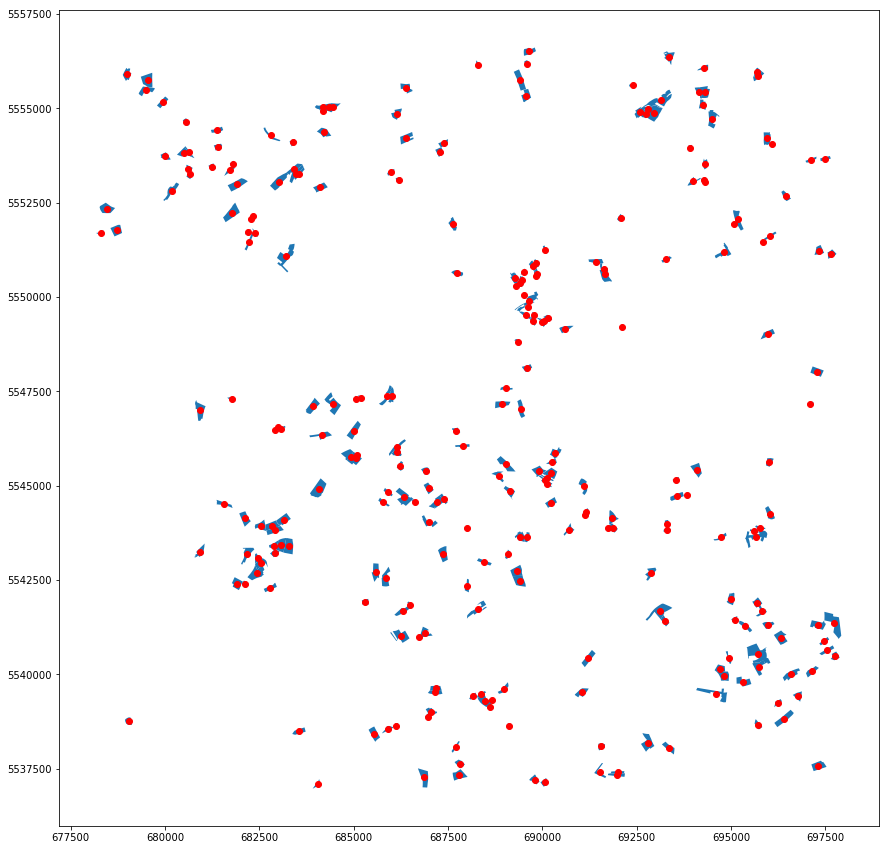

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(15,15))

maize_gdf.plot(ax=ax)
maize_centroid_gdf.plot(ax=ax, color='red')

In [20]:
maize_centroid_gdf.to_file(sigec_student_shp)